# Task - Building user-based recommendation model for Amazon

### DESCRIPTION
    The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.
### Data Dictionary
    UserID – 4848 customers who provided a rating for each movie
    Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users
### Data Considerations
    - All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
    - Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

In [ ]:
# importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# reading data 
df = pd.read_csv('Amazon - Movies and TV Ratings.csv')
df

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [89]:
df.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [3]:
# checking shape of dataset 
df.shape

(4848, 207)

In [4]:
# making copy of orinal dataset
df_orginal = df.copy()

In [5]:
# describe data set 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


## Exploratory Data Analysis 

### Task1 - Which movies have maximum views/ratings ?

In [7]:
# Movie with highest views 
highest_views =df.describe().T['count'].sort_values(ascending = False)[:5].to_frame()
highest_views

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0


In [25]:
# Configuring styles
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (14,8 )
plt.rcParams['figure.facecolor'] = '#00000000'

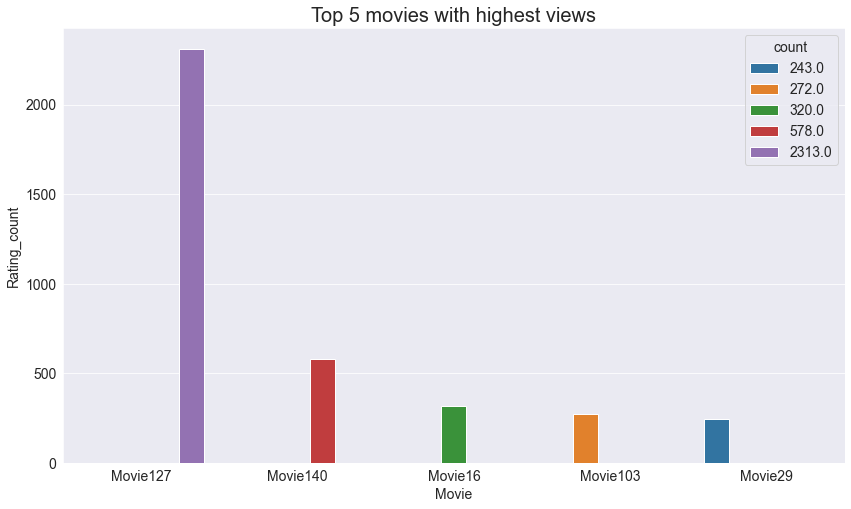

In [34]:
# plotting data on graph 
plt.title('Top 5 movies with highest views', size = 20)
sns.barplot(x= highest_views.index, y= highest_views['count'],hue = highest_views['count'])
plt.xlabel('Movie')
plt.ylabel('Rating_count')
plt.show();

In [33]:
# Movies with highest ratings 
df1 = df.drop('user_id',axis=1) # dropping user_id column
highest_ratings = df1.sum().sort_values(ascending = False)[:5].to_frame()
highest_ratings

,0
Movie127,9511.0
Movie140,2794.0
Movie16,1446.0
Movie103,1241.0
Movie29,1168.0


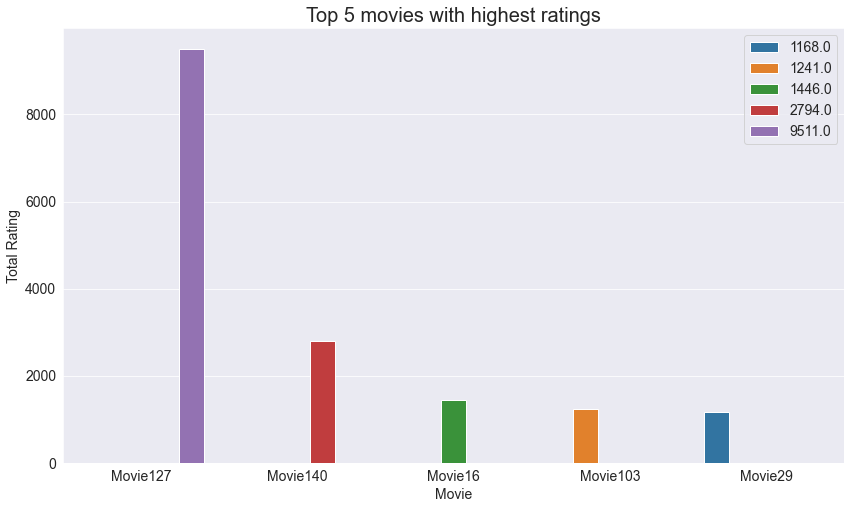

In [36]:
# plotting movies with highest ratings
plt.title('Top 5 movies with highest ratings', size =20)
sns.barplot(x= highest_ratings.index , y = highest_ratings[0],hue = highest_ratings[0])
plt.xlabel('Movie')
plt.ylabel('Total Rating')
plt.show();

### Task2 - What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

In [37]:
# Average ratings of each movie 
df2 = df.drop('user_id',axis=1) # dropping user_id column
mean_ratings = df2.mean().sort_values(ascending = False).to_frame()
mean_ratings

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0
...,...
Movie58,1.0
Movie60,1.0
Movie154,1.0
Movie45,1.0


In [38]:
# Top 5 movies with highest ratings 
mean_ratings.head(5)

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


### Task3 - Define the top 5 movies with the least audience.

In [39]:
df.describe().T['count'].sort_values(ascending=True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


## User-Based Reommendation Model 

In [41]:
#importing required libraries
from sklearn.model_selection import train_test_split

In [50]:
n_users = df.shape[0]
n_users

4848

In [49]:
n_movies = df.shape[1]
n_movies

207

In [75]:
# filling NaN values 
df_recommend = df.fillna(0.0)
df_recommend 

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4844,A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4845,A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4846,A3UU690TWXCG1X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [98]:
# dropping user id
df_for_model = df_recommend.drop('user_id', axis=1)
df_for_model

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [100]:
#checking data type
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 206 entries, Movie1 to Movie206
dtypes: float64(206)
memory usage: 7.6 MB


In [81]:
# splitting dataset into train test 
train_data, test_data = train_test_split(df_for_model,test_size=0.25)

In [85]:
# preparing train data matrix
train_data_matrix = train_data.to_numpy()
train_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
# preparing test data matrix
test_data_matrix = test_data.to_numpy()
test_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
# import paiwise distances matrics
from sklearn.metrics import pairwise_distances

In [88]:
# user similarity matrix
user_similarity = pairwise_distances(train_data_matrix, metric ='cosine')
user_similarity

array([[0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [90]:
# Movie similarity matrix
movie_similarity = pairwise_distances(train_data_matrix.T, metric ='cosine')
movie_similarity

array([[0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [91]:
# Average user rating matrix
mean_user_rating = train_data_matrix.mean(axis=1)[:,np.newaxis]
mean_user_rating

array([[0.02427184],
       [0.02427184],
       [0.02427184],
       ...,
       [0.01941748],
       [0.01941748],
       [0.02427184]])

In [94]:
# calculating rating difference 
rating_diff =  (train_data_matrix - mean_user_rating )

In [95]:
# predicting user ratings for movies 
user_prediction = mean_user_rating + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis=1)]).T

In [96]:
# user prediction matrix
user_prediction

array([[ 0.00335214,  0.00335214,  0.0017821 , ...,  0.01643575,
         0.06301343,  0.02376258],
       [ 0.00335214,  0.00335214,  0.0017821 , ...,  0.01643575,
         0.06301343,  0.02376258],
       [ 0.00411771,  0.00411771,  0.00317786, ...,  0.01194975,
         0.0398318 ,  0.01633569],
       ...,
       [-0.00113128, -0.00113128, -0.00196055, ...,  0.00577933,
         0.03038111,  0.00964928],
       [-0.00090917, -0.00090917, -0.0017777 , ...,  0.00632864,
         0.03209524,  0.01038181],
       [ 0.0036898 ,  0.0036898 ,  0.0028597 , ...,  0.01060735,
         0.0352338 ,  0.01448117]])

In [97]:
# converting predicted ratings to data frame 
user_predicted_ratings = pd.DataFrame(user_prediction)
user_predicted_ratings

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
1,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
2,0.004118,0.004118,0.003178,0.005684,0.031686,0.003804,0.004118,0.004118,0.004118,0.004118,...,0.005684,0.003010,0.002551,0.014143,0.006624,0.010697,0.003491,0.011950,0.039832,0.016336
3,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
4,0.004118,0.004118,0.003178,0.005684,0.031686,0.003804,0.004118,0.004118,0.004118,0.004118,...,0.005684,0.003010,0.002551,0.014143,0.006624,0.010697,0.003491,0.011950,0.039832,0.016336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,-0.016065,-0.016065,-0.017635,-0.013449,0.029989,-0.016589,-0.016065,-0.016065,-0.016065,-0.016065,...,-0.013449,-0.016065,-0.018682,0.000682,-0.011879,-0.006925,-0.017112,-0.002982,0.043596,0.004345
3632,0.003708,0.003708,0.002880,0.005088,0.027994,0.003432,0.003708,0.003708,0.003708,0.003708,...,0.005088,0.003708,0.002328,0.012539,0.005916,0.009504,0.003156,0.010608,0.035169,0.014471
3633,-0.001131,-0.001131,-0.001961,0.000251,0.023194,-0.001408,-0.001131,-0.001131,-0.001131,-0.001131,...,0.000251,-0.001131,-0.002513,0.007714,0.001080,0.004674,-0.001684,0.005779,0.030381,0.009649
3634,-0.000909,-0.000909,-0.001778,0.000538,0.024568,-0.001199,-0.000909,-0.000909,-0.000909,-0.000909,...,0.000538,-0.000909,-0.002357,0.008355,0.001407,0.005171,-0.001488,0.006329,0.032095,0.010382


In [102]:
# adding user_id to the predicted dataframe
user_id = df['user_id']
user_predicted_ratings.insert(loc = 0,
          column = 'user_id',
          value = user_id)

In [103]:
# final user predicted ratings
user_predicted_ratings

,user_id,0,1,2,3,4,5,6,7,8,...,196,197,198,199,200,201,202,203,204,205
0,A3R5OBKS7OM2IR,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
1,AH3QC2PC1VTGP,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
2,A3LKP6WPMP9UKX,0.004118,0.004118,0.003178,0.005684,0.031686,0.003804,0.004118,0.004118,0.004118,...,0.005684,0.003010,0.002551,0.014143,0.006624,0.010697,0.003491,0.011950,0.039832,0.016336
3,AVIY68KEPQ5ZD,0.003352,0.003352,0.001782,0.005969,0.049406,0.002829,0.003352,0.003352,0.003352,...,0.005969,0.003352,0.000735,0.020099,0.007539,0.012492,0.002305,0.016436,0.063013,0.023763
4,A1CV1WROP5KTTW,0.004118,0.004118,0.003178,0.005684,0.031686,0.003804,0.004118,0.004118,0.004118,...,0.005684,0.003010,0.002551,0.014143,0.006624,0.010697,0.003491,0.011950,0.039832,0.016336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,A3S7Z9PRDH2C7L,-0.016065,-0.016065,-0.017635,-0.013449,0.029989,-0.016589,-0.016065,-0.016065,-0.016065,...,-0.013449,-0.016065,-0.018682,0.000682,-0.011879,-0.006925,-0.017112,-0.002982,0.043596,0.004345
3632,A2D63RN5LF14R2,0.003708,0.003708,0.002880,0.005088,0.027994,0.003432,0.003708,0.003708,0.003708,...,0.005088,0.003708,0.002328,0.012539,0.005916,0.009504,0.003156,0.010608,0.035169,0.014471
3633,ABPIXL29ZJUL,-0.001131,-0.001131,-0.001961,0.000251,0.023194,-0.001408,-0.001131,-0.001131,-0.001131,...,0.000251,-0.001131,-0.002513,0.007714,0.001080,0.004674,-0.001684,0.005779,0.030381,0.009649
3634,A31ACI0E88ORDE,-0.000909,-0.000909,-0.001778,0.000538,0.024568,-0.001199,-0.000909,-0.000909,-0.000909,...,0.000538,-0.000909,-0.002357,0.008355,0.001407,0.005171,-0.001488,0.006329,0.032095,0.010382


## Conclusion 

- We can predict the probablity of user to like a movie from the above matrix
- We can also recommend them movies which they haven't seen from the above matrix